# Fitting Simple Models Using Gradient Descent in the Squared Error

## Linear Structure

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

Given $N$ observations, $\xv_n$, for $n=1,\ldots,N$, and target values,
$t_n$, for $n=1,\ldots,N$, what is the simplest model,
$g(\xv)$, you can think of?

$$
g(\xv) = 0
$$

or maybe

$$
g(\xv) = c
$$

What is next simplest model?

$$
\begin{align*}
   g(\xv;\wv) &= w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D \\
   &= w_0 + \sum_{i=1}^D w_i x_i \\
   & = \sum_{i=0}^D w_i x_i \mbox{, where } x_0 = 1 \\
   &= \wv^T \xv\\
   &= \xv^T \wv
\end{align*}
$$

  * This is nice because it is linear in the parameters $\wv$; optimizations based on derivatives might be solvable analytically.
  * This is not so nice, because it is also linear in the inputs, $\xv$; greatly limits the complexity of the model.
  *  But, a model linear in the inputs might be the best you can do for many cases, such as a sparsely sampled distribution, process, population, thing...whatever it is you want to model.


## Fitting Data Samples with a Linear Model

![Springs](http://www.cs.colostate.edu/~anderson/cs545/notebooks/springs.png)

Force exerted by spring is proportional to its length. The potential
energy stored in the spring is proportional to the square of its length.
Say we want the rod to settle at position that minimizes the potential
energy in the springs.
$$
\begin{align*}
\sum_{n=1}^N (t_n - g(\xv_n;\wv))^2
\end{align*}
$$

If $g$ is an affine (linear + constant) function of $x$,
$$
    g(\xv;\wv) = w_0 + w_1 x
$$
with parameters $\wv = (w_0, w_1)$, which parameter values give best fit?
$$
    \wv_{\mbox{best}} = \argmin{\wv} \sum_{n=1}^N (t_n - g(x_n ; \wv))^2
$$

Set derivative (gradient) with respect to $\wv$ to zero and
solve for $\wv$.  Let's do this with matrices. 

The matrix formulas are a bit simpler if we assume that $w_0$ is multipled by the constant 1, and that $x_{i, 0}$, the first component of sample $i$, is the constant 1.

Collect all targets into matrix $T$ and $x$ samples into matrix
$X$. ($N$=number samples, $D$=sample dimensionality)
$$
  \begin{align*}
    T &= \begin{bmatrix}
      t_1 \\ t_2 \\ \vdots \\ t_N
    \end{bmatrix} \\
    X &= \begin{bmatrix}
      x_{1,0} & x_{1,1} & x_{1,2} & \dotsc & x_{1,D} \\
      x_{2,0} & x_{2,1} & x_{2,2} & \dotsc & x_{2,D} \\
      \vdots \\
      x_{N,0} & x_{N,1} & x_{N,2} & \dotsc & x_{N,D}
    \end{bmatrix}\\
    \wv &= \begin{bmatrix} w_0 \\ w_1 \\ \vdots \\ w_D \end{bmatrix}
  \end{align*}
$$

Collection of all differences is $T - X\wv$, which is an $N \times
1$ matrix.  To form the square of all values and add them up, just
do a dot product $(T-X\wv)^T (T-X\wv)$.  This only works if the value we are predicting is a scalar, which means $T$ is a column matrix.  If we want to predict more than one value for each sample, $T$ will have more than one column.  Let's continue with the derivation assuming $T$ has $K$ columns, meaning we want a linear model with $K$ outputs.

To find the best value for $\wv$, we take the derivative of the sum of squared error objective, set it equal to 0 and solve for $\wv$. Here $\xv_n$ is one sample as a column vector, so it must be transposed to a row vector before being multiplied by the column vector $\wv$.

$$
\begin{align*}
\frac{\partial \sum_{n=1}^N (\tv_n - g(\xv_n;\wv))^2}{\partial \wv} &= -2 \sum_{n=1}^N (\tv_n - g(\xv_n;\wv) \frac{\partial g(\xv_n;\wv)}{\partial \wv}\\
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \frac{\partial \xv_n^T \wv}{\partial \wv}\\
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \xv_n
\end{align*}
$$

Here's where we get the benefit of expressing the $\xv_n$ and $t_n$ samples as matrices. The sum can be performed with a dot product:

$$
\begin{align*}
\frac{\partial \sum_{n=1}^N (\tv_n - g(\xv_n;\wv))^2}{\partial \wv} 
&= -2 \sum_{n=1}^N (\tv_n - \xv_n^T \wv) \xv_n\\
&= -2 \Xv^T (\Tv - \Xv \wv)
\end{align*}
$$

Check the sizes and shapes of each matrix in the last equation above.

Now we can set this equal to zero and solve for $\wv$.

$$
\begin{align*}
-2 \Xv^T (\Tv - \Xv \wv) &= 0\\
\Xv^T (\Tv - \Xv \wv) &= 0\\
\Xv^T \Tv &= \Xv^T \Xv \wv\\
\wv &= (\Xv^T \Xv)^{-1} \Xv^T \Tv
\end{align*}
$$

And, in python

    w = np.linalg.inv(X.T @ X), X.T @ T)

or, you may use the *solve* function that assumes $\Xv^T \Xv$ is full rank (no linearly dependent columns),

    w = np.linalg.solve(X.T @ X, X.T @ T)

or, better yet, use the *lstsq* function that does not make that assumption. 

    w = np.linalg.lstsq(X.T @ X, X.T @ T))
    
The ```lstsq``` and ```solve``` functions can be written with simpler arguments, like

    w = np.linalg.lstsq(X, T))
    
because they are designed to find the value of $\wv$ that minimized the squared error between $X \wv$ and $T$. 

## Incremental Way

But what if you have thousands or millions of samples?  $X$ and $T$
can be quite large. To avoid dealing with matrix operations on huge
matrices, we can derive a sequential algorithm for finding $\wv$ by
using the fact that a derivative of a sum is the sum of the
derivatives.  We will now express this derivative as a gradient, which is a vector or matrix of derivatives.

$$
\begin{align*}
g(\xv_n, \wv) &= w_0 + w_1 x_{n,1} + w_2 x_{n,2} + \cdots + w_D x_{n,D} = \xv_n^T \wv\\
E(\Xv, \Tv, \wv) &= \sum_{n=1}^N (t_n - g(\xv_n, \wv))^2\\
\nabla_\wv E(\Xv, \Tv, \wv) &= \nabla_\wv \left ( \sum_{n=1}^N (t_n - g(\xv_n, \wv))^2 \right )\\
&= 
\sum_{n=1}^N \nabla_\wv (t_n - g(\xv_n, \wv))^2\\
&= 
\sum_{n=1}^N 2 (t_n - g(\xv_n, \wv)) \nabla_\wv (t_n - g(\xv_n, \wv)) \\
&= 
\sum_{n=1}^N 2 (t_n - g(\xv_n, \wv)) (-1) \nabla_\wv g(\xv_n, \wv) \\
&= 
\sum_{n=1}^N 2 (t_n - g(\xv_n, \wv)) (-1) \nabla_\wv (\xv_n^T \wv) \\
&= 
\sum_{n=1}^N 2 (t_n - g(\xv_n, \wv)) (-1) \xv_n \\
&= 
-2 \sum_{n=1}^N (t_n - g(\xv_n, \wv))  \xv_n \\
\end{align*}
$$

Instead of summing over all $N$ samples, what if we
just update $\wv$ after each sample based on the gradient of $E$ for that sample?  The gradient for a 
sample $n$ can be
considered as a limited, or noisy, sample of the true gradient.
Thus, we can take a small step in the direction of the negative gradient to try
to bring a current guess at the weight vector, $\wv^{(k)}$, on
iteration $k$ to a new value, $\wv^{(k+1)}$, on iteration $k+1$ that is closer to a value that reduces the overall error. This kind of update is called "stochastic approximation".

$$
\begin{align*}
\wv^{(k+1)} &= \wv^{(k)} - (-2) \rho (t_n - g(\xv_n, \wv)) \xv_n\\
 &= \wv^{(k)} + \rho (t_n - g(\xv_n, \wv)) \xv_n
\end{align*}
$$

For this sequential algorithm to converge, $\rho$ must decrease with
each iteration, not too fast but not too slow. 

This algorithm is called the least mean squares (LMS) algorithm
developed by Widrow and Hoff.  It is now often referred to as the
**''stochastic gradient descent'' algorithm, or SGD.**

If we have two output variables $t_n$ is no longer a scalar.  How do we deal with that?  Well, to predict two variables, we need two linear models.  We can do this by changing $\wv$ from a single column matrix to a two-column matrix.  The first column could contain the weights used to predict mpg, and the second column could contain weights to predict horsepower.  Now our linear model is

$$ g(\xv_n, \wv) = \xv_n^T \wv$$

Humm, no change here!  This is the beauty of using matrix math.  The input vector $\xv_n$ is dotted with each of the two columns of $\wv$, resulting in two values, or a two-component resulting vector, giving the predictions for mpg and horsepower.

What changes do we need to make to the SGD update formula?  What else must we modify, other than $\wv$?  For each sample, $n$, we must specify two target values, for mpg and horsepower.  So $t_n$ is no longer a scalar, but now has two values in a vector, or $\tv_n$.  To update the weights $\wv$ we must multiply each error by each input component. This does sound like a double loop.  Well, in the last equation above we already used matrix math and ```numpy``` broadcasting once in

$$
\begin{align*}
\wv^{(k+1)} &= \wv^{(k)}  + \rho \; (t_n - g(\xv_n, \wv)) \; \xv_n
\end{align*}
$$

to remove the loop over all of the components in $\wv_n$ and $\xv_n$.  Now we will use broadcasting again to remove a loop over target components, in $\tv_n$.  We must take care to make sure the matrices are of the right shape in the matrix operations, and that the resulting matrix is the correct shape for $\wv$.  Here we follow the convention that vectors are column vectors.

$$
\begin{align*}
\wv^{(k+1)} &= \wv^{(k)}  + \rho \; \xv_n \; (\tv_n^T - g(\xv_n, \wv))) 
\end{align*}
$$

Let's see, $\rho$ is a scalar, $\xv_n$ is $D+1\times 1$, a column vector with $D+1$ components (counting the constant 1), $\tv_n$ is $K\times 1$ if we have $K$ outputs,
so $\tv_n^T$ is $1\times K$  and $g(\xv_n, \wv) = \xv_n^T \wv$ is also $1\times K$.  Stringing these dimensions together in the  calculation gives us $(D+1\times 1) (1\times K)$ which results in $D+1\times K$ exactly the correct shape for our weight matrix $\wv$!

In Python, the update to the weight matrix for the $n^{th}$ sample is just

     w += rho * X1[n:n + 1, :].T * (T[n:n + 1, :] - predicted)
     
The long, boring, non-matrix way to update each element of `w` would look like

     nOutputs = T.shape[1]
     nInputs = X1.shape[1]
     for k in range(nOutputs):
         for i in range(nInputs):
             w[i,k] += rho * X1[n:n + 1, i] * (T[n:n + 1, k] - predicted[k])

So many lines of code can lead to more bugs!!

## Example of SGD in Action

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, clear_output  # for the following animation

In [51]:
p = np.random.randn(10, 10)
p[5:6, 7:8]

array([[-0.28350732]])

Let's make some silly data to play with.  Make 100 samples of random $x$ values between 0 and 10, and assign the target for each sample to be $2 - 0.1 X + (X - 6)^2 + \epsilon$, where $\epsilon$ is a bit of noise as a random value from a Normal distribution with mean 0 and standard deviation 0.1.

In [56]:
n_samples = 100
X = np.random.uniform(0, 10, (n_samples, 1))
T = 2 - 0.1 * X + 0.05 * (X - 6)**2 + np.random.normal(0, 0.1, (n_samples,1))

In [57]:
np.random.normal?

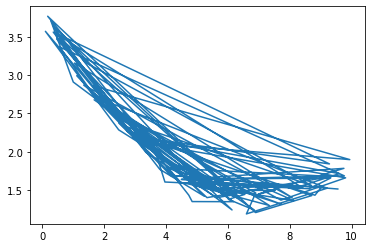

In [64]:
plt.plot(X, T)

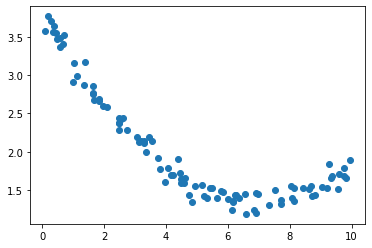

In [65]:
plt.plot(X, T, 'o');  # ;  suppresses one line of output like [<matplotlib.lines.Line2D at 0x7f9657fa0c40>]

Do you think we can fit a linear model to this data?

First, let's modify the $X$ input matrix to include an initial column of constant 1.

In [69]:
X1 = np.insert(X, 0, 1, axis=1)

X1.shape, T.shape

((100, 2), (100, 1))

In [70]:
X1[:5, :]

array([[1.        , 9.55210179],
       [1.        , 4.15792121],
       [1.        , 1.95891565],
       [1.        , 1.66028482],
       [1.        , 6.2480708 ]])

Now we will find good weights by adjusting them to follow the negative gradient of the squared error function using the stochastic gradient descent (SGD) algorithm.

In [74]:
learning_rate = 0.01
n_samples = X1.shape[0]  # number of rows in data equals the number of samples

W = np.zeros((2, 1))                # initialize the weights to zeros
for epoch in range(10):             # train for this many epochs, or passes through the data set
    for n in range(n_samples):
        Y = X1[n:n + 1, :] @ W      # predicted value, y, for sample n
        error = (T[n:n + 1, :] - Y)  # negative gradient of squared error
        
        # update weights by fraction of negative derivative of square error with respect to weights
        W -=  learning_rate * -2 * X1[n:n + 1, :].T * error  
        
print(W)

[[ 3.00028992]
 [-0.10968813]]


Let's see how well this linear model (defined by these resulting weights) fits the data.  To do so, we can plot the model's predictions on top of the plot of actual data.

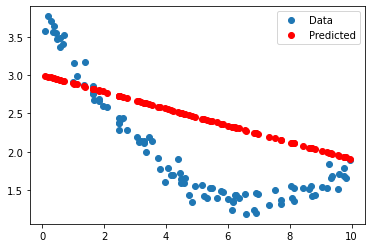

In [75]:
plt.plot(X, T, 'o', label='Data')
plt.plot(X, X1 @ W, 'ro', label='Predicted')
plt.legend();

Let's animate each step by drawing the predictions made by the linear model as weights are updated.

In [82]:
def run(rho, n_epochs, stepsPerFrame=10):

    # Initialize weights to all zeros
    # For this demonstration, we will have one variable input. With the constant 1 input, we have 2 weights.
    W = np.zeros((2,1))

    # Collect the weights after each update in a list for later plotting. 
    # This is not part of the training algorithm
    ws = [W.copy()]

    # Create a bunch of x values for plotting
    xs = np.linspace(0, 10, 100).reshape((-1, 1))
    xs1 = np.insert(xs, 0, 1, axis=1)

    fig = plt.figure(figsize=(8, 8))

    # For each pass (one epoch) through all samples ...
    for iter in range(n_epochs):
        # For each sample ...
        for n in range(n_samples):
        
            # Calculate prediction using current model, w.
            #    n:n+1 is used instead of n to preserve the 2-dimensional matrix structure
            Y = X1[n:n + 1,:] @ W
            
            # Update w using negative gradient of error for nth sample
            W += rho * X1[n:n + 1, :].T * (T[n:n + 1, :] - Y)
            
            # Add new w to our list of past w values for plotting
            ws.append(W.copy())
        
            if n % stepsPerFrame == 0:
                fig.clf()

                # Plot the X and T data.
                plt.subplot(2, 1, 1)
                plt.plot(X, T, 'o', alpha=0.6, label='Data')
                plt.plot(X[n,0], T[n], 'ko', ms=10, label='Last Trained Sample')

                # Plot the output of our linear model for a range of x values
                plt.plot(xs, xs1 @ W, 'r-', linewidth=5, label='Model')
                plt.xlabel('$x$')
                plt.legend(loc='upper right')
                plt.xlim(0, 10)
                plt.ylim(0, 5)

                # In second panel plot the weights versus the epoch number
                plt.subplot(2, 1, 2)
                plt.plot(np.array(ws)[:, :, 0])
                plt.xlabel('Updates')
                plt.xlim(0, n_epochs * n_samples)
                plt.ylim(-1, 3)
                plt.legend(('$w_0$', '$w_1$'))
        
                clear_output(wait=True)
                display(fig)
    
    clear_output(wait=True)
    
    return W

array([[0.72664045],
       [0.13808871]])

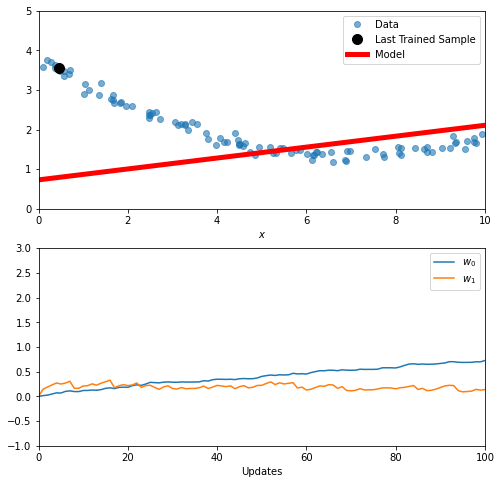

In [83]:
run(0.01, n_epochs=1, stepsPerFrame=1)

array([[ 3.00960624],
       [-0.12570999]])

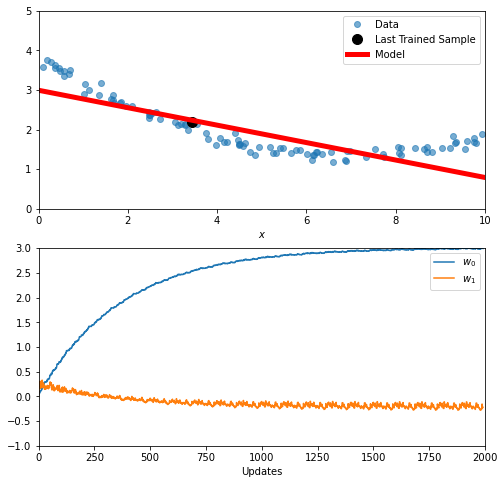

In [84]:
run(0.01, n_epochs=20, stepsPerFrame=10)

# Linear Regression with Fixed Nonlinear Features

The models we have been buildling are linear in the parameters $\wv$
and linear in the attributes (features) of the samples.  We can make
models that are nonlinear in the attributes by adding nonlinear
functions of the original features.  

Say we have a single feature for each sample.  Our data matrix is
$$
\begin{alignat*}{1}
 X &= \begin{bmatrix}
       x_0\\
       x_1\\
       \vdots \\
       x_N
       \end{bmatrix}
\end{alignat*}
$$
We can add other powers of each $x$ value, say up to the fourth power.
$$
\begin{alignat*}{1}
 X &= \begin{bmatrix}
       x_0 & x_0^2 & x_0^3 & x_0^4\\
       x_1 & x_1^2 & x_1^3 & x_1^4\\
       \vdots \\
       x_N & x_N^2 & x_N^3 & x_N^4\\
       \end{bmatrix}
\end{alignat*}
$$

This is simple to do in python.

In [85]:
X = np.array([1.1, 2.3, 6.2, 4.2]).reshape(-1, 1)
X

array([[1.1],
       [2.3],
       [6.2],
       [4.2]])

In [86]:
X ** 2

array([[ 1.21],
       [ 5.29],
       [38.44],
       [17.64]])

In [87]:
X ** [1, 2, 3]

array([[  1.1  ,   1.21 ,   1.331],
       [  2.3  ,   5.29 ,  12.167],
       [  6.2  ,  38.44 , 238.328],
       [  4.2  ,  17.64 ,  74.088]])

In [88]:
X ** range(1, 4)

array([[  1.1  ,   1.21 ,   1.331],
       [  2.3  ,   5.29 ,  12.167],
       [  6.2  ,  38.44 , 238.328],
       [  4.2  ,  17.64 ,  74.088]])

Hey, we can raise X to an exponent of 0 to include the initial column of constant 1 values!

In [89]:
X ** range(0, 4)

array([[  1.   ,   1.1  ,   1.21 ,   1.331],
       [  1.   ,   2.3  ,   5.29 ,  12.167],
       [  1.   ,   6.2  ,  38.44 , 238.328],
       [  1.   ,   4.2  ,  17.64 ,  74.088]])

But, what if we have more than 1 input feature in X?

In [90]:
X = np.arange(10).reshape(5, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [91]:
X ** 2

array([[ 0,  1],
       [ 4,  9],
       [16, 25],
       [36, 49],
       [64, 81]])

In [92]:
X ** [2, 3, 4]

ValueError: operands could not be broadcast together with shapes (5,2) (3,) 

In [ ]:
X ** np.array([2, 3, 4])

Rats!   Not working. We must assemble our powers of X one at a time.

In [ ]:
[X ** p for p in [1, 2, 3]]

In [96]:
p =np.hstack([X ** p for p in [1, 2, 3]])

In [101]:
p.std(axis=0)

array([  2.82842712,   2.82842712,  23.59660993,  29.0654434 ,
       192.33304448, 270.30353309])

In [16]:
def make_powers(X, max_power):
    return np.hstack([X ** p for p in range(1, max_power + 1)])

Which of these powers of $x$ are useful?  Looking at the magnitudes of
the weights is helpful, as long as the input features have similar ranges.  A typical way to force this is to *standardize* the inputs.  This usually means the we subtract the mean of each feature from the values of that feature, then divide by its standard deviation.  So we must first calculate the column means and column standard deviations of $X$.  No worries, `numpy` can do that!

        Xst = (X - np.mean(X, axis=0)) / np.std(X, axis=0)      
We will be standardizing inputs like this throughout the semester.

Now, if we train multiple
models from multiple [bootstrap samples](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)) of the training data, we can
compute confidence intervals of the weight values.  If zero is
not included in the range of
weight values specified by a weight's 90% lower and
upper confidencce limit, then we can say that we are 90% certain that
the value of this weight is not zero.  If the range does include zero,
the corresponding feature is probably one that is not useful.

In [17]:
def train(X, T, n_epochs, rho):
    
    means = X.mean(0)
    stds = X.std(0)
    # Replace stds of 0 with 1 to avoid dividing by 0.
    stds[stds == 0] = 1
    Xst = (X - means) / stds
    
    Xst = np.insert(Xst, 0, 1, axis=1)  # Insert column of 1's as first column in Xst
    
    # n_samples, n_inputs = Xst.shape[0]
    n_samples, n_inputs = Xst.shape
    
    # Initialize weights to all zeros
    W = np.zeros((n_inputs, 1))  # matrix of one column
    
    # Repeat updates for all samples for multiple passes, or epochs,
    for epoch in range(n_epochs):
        
        # Update weights once for each sample.
        for n in range(n_samples):
        
            # Calculate prediction using current model, w.
            #    n:n+1 is used instead of n to preserve the 2-dimensional matrix structure
            Y = Xst[n:n + 1, :] @ W
            
            # Update w using negative gradient of error for nth sample
            W += rho * Xst[n:n + 1, :].T * (T[n:n + 1, :] - Y)
                
    # Return a dictionary containing the weight matrix and standardization parameters.
    return {'W': W, 'means' : means, 'stds' :stds, 'max_power': max_power}

def use(model, X):
    Xst = (X - model['means']) / model['stds']
    Xst = np.insert(Xst, 0, 1, axis=1)
    Y = Xst @ model['W']
    return Y

def rmse(A, B):
    return np.sqrt(np.mean( (A - B)**2 ))

Now, make a simple function of $x$. Let's try $f(x) = -1 + 0.1 x^2 - 0.02 x^3 + 0.5 n$, where $n$ is from a standard Normal distribution.

In [102]:
n_samples = 40
training_fraction = 0.8
n_models = 1000
confidence = 90 # percent
max_power = 1  # linear model

X = np.hstack((np.linspace(0, 3, num=n_samples),
               np.linspace(6, 10, num=n_samples))).reshape(2 * n_samples, 1)
T = -1 + 0 * X + 0.1 * X**2 - 0.02 * X**3 + 0.5 * np.random.normal(size=(2 * n_samples, 1))
X.shape, T.shape

((80, 1), (80, 1))

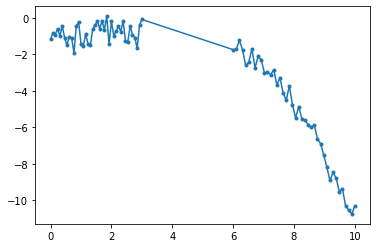

In [103]:
plt.plot(X, T, '.-');

Divide data into training and testing sets, randomly.

In [31]:
round(7.8)

8

In [115]:
n_rows = X.shape[0]
row_indices = np.arange(n_rows)
np.random.shuffle(row_indices)
n_train = round(n_rows * training_fraction)
n_test = n_rows - n_train
Xtrain = X[row_indices[:n_train], :]
Ttrain = T[row_indices[:n_train], :]
Xtest = X[row_indices[n_train:], :]
Ttest = T[row_indices[n_train:], :]

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((64, 1), (64, 1), (16, 1), (16, 1))

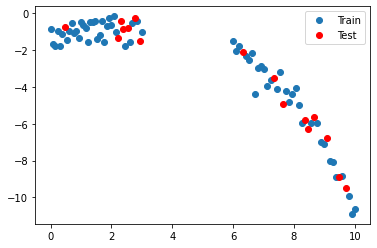

In [40]:
plt.plot(Xtrain[:, 0], Ttrain, 'o', label='Train')
plt.plot(Xtest[:, 0], Ttest, 'ro', label='Test')
plt.legend(loc='best');

Make models based on bootstrap samples of training data.  `models` will be list of models, one for each bootstrap sample.

For each bootstrap sample of our training data we will randomly choose `n_train` samples **with replacement**.  The following code cell illustrates how to create 20 bootstrap samples, each with 10 samples.  The bootstrap samples are defined as row indices.

In [48]:
np.random.choice(list(range(11)), 20)

array([ 1,  7,  0,  6,  9,  9,  7,  6,  9,  1,  0,  1,  8,  8,  3, 10,  9,
        8,  7,  3])

In [118]:
max_power = 1
Xtrain = X[row_indices[:n_train], :]
Xtest = X[row_indices[n_train:], :]
Xtrain = make_powers(Xtrain, max_power)
Xtest = make_powers(Xtest, max_power)

n_epochs = 1000
rho = 0.01

n_models = 10

models = []
for model_i in range(n_models):
    train_rows = np.random.choice(list(range(n_train)), n_train)
    Xtrain_boot = Xtrain[train_rows, :]
    Ttrain_boot = Ttrain[train_rows, :]
    model = train(Xtrain_boot, Ttrain_boot, n_epochs, rho)
    models.append(model)

In [119]:
len(models)

10

In [120]:
models[0]

{'W': array([[-2.23601716],
        [-1.82879739]]),
 'means': array([4.04407051]),
 'stds': array([3.18689193]),
 'max_power': 1}

Now we will apply all of the models to the test data.

In [121]:
use(models[0], Xtest)

array([[-0.26846634],
       [-4.94754957],
       [-0.44503552],
       [ 0.04052972],
       [-1.10716994],
       [-4.35898564],
       [-1.50445059],
       [-0.40089322],
       [-5.30068792],
       [-5.00640596],
       [-4.24127285],
       [-0.5774624 ],
       [-0.84231617],
       [-5.41840071],
       [-1.59273518],
       [-5.5361135 ]])

In [122]:
Y_all = []
for model in models:
    Y_all.append( use(model, Xtest) )

In [132]:
# Y_all

In [123]:
len(Y_all)

10

In [129]:
Y_all[0].shape  # The number of rows will be 16 because 16 rows in test data

(16, 1)

Let's create a `numpy.array` for all outputs of all models so we can easily calculate the mean for each test sample over all models.

In [133]:
np.array(Y_all).shape

(10, 16, 1)

Use `numpy.squeeze` to wring out the "unused" dimension.

In [136]:
np.array(Y_all).squeeze().shape

(10, 16)

In [137]:
Y_all = np.array(Y_all).squeeze().T  # I like putting each model's output in a column, so `Y_all` now has each model's output for a sample in a row.
Ytest = np.mean(Y_all, axis=1)

In [138]:
Ytest.shape

(16,)

In [139]:
RMSE_test = np.sqrt(np.mean((Ytest - Ttest)**2))
print(f'Test RMSE is {RMSE_test:.4f}')

Test RMSE is 4.4946


In [140]:
n_plot = 200
Xplot = np.linspace(0, 12.5, n_plot).reshape(n_plot, 1)
Xplot_powers = make_powers(Xplot, max_power)
Ys = []
for model in models:
    Yplot = use(model, Xplot_powers)
    Ys.append(Yplot)

In [141]:
len(Ys)

10

In [142]:
Ys[0].shape

(200, 1)

In [143]:
np.array(Ys).shape

(10, 200, 1)

In [144]:
Ys = np.array(Ys).squeeze().T
Ys.shape

(200, 10)

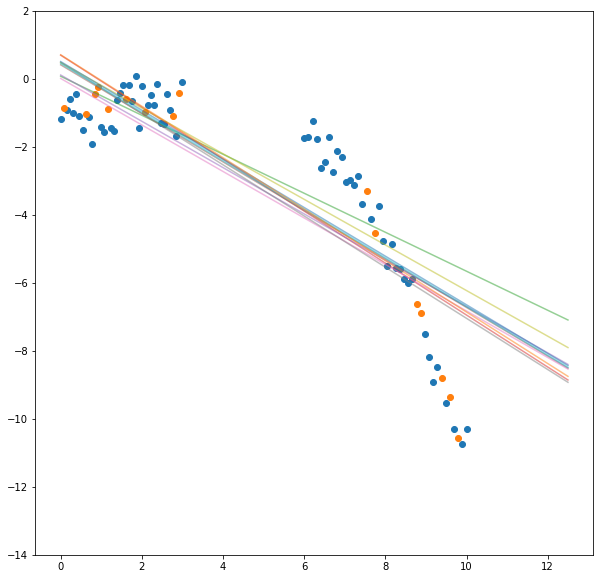

In [145]:
plt.figure(figsize=(10, 10))
plt.plot(Xtrain[:, 0], Ttrain, 'o')
plt.plot(Xtest[:, 0], Ttest, 'o')
plt.plot(Xplot, Ys, alpha=0.5);
plt.ylim(-14, 2);

Do again with nonlinear terms.

Model 0 Model 1 Model 2 Model 3 Model 4 Model 5 Model 6 Model 7 Model 8 Model 9 

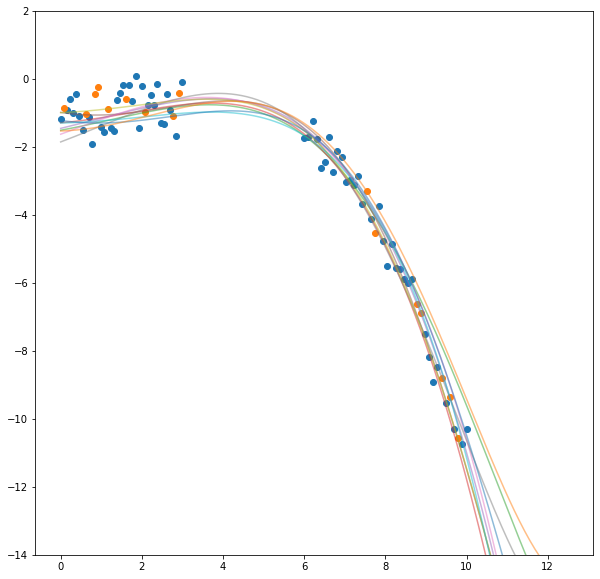

In [147]:
max_power = 6
Xtrain = X[row_indices[:n_train], :]
Xtest = X[row_indices[n_train:], :]
Xtrain = make_powers(Xtrain, max_power)
Xtest = make_powers(Xtest, max_power)

n_epochs = 2000
rho = 0.05

n_models = 10 

models = []
for model_i in range(n_models):
    train_rows = np.random.choice(list(range(n_train)), n_train)
    Xtrain_boot = Xtrain[train_rows, :]
    Ttrain_boot = Ttrain[train_rows, :]
    model = train(Xtrain_boot, Ttrain_boot, n_epochs, rho)
    models.append(model)
    print(f'Model {model_i}', end=' ')
    
n_plot = 200
Xplot = np.linspace(0, 12.5, n_plot).reshape(n_plot, 1)
Xplot_powers = make_powers(Xplot, max_power)
Ys = []
for model in models:
    Yplot = use(model, Xplot_powers)
    Ys.append(Yplot)

Ys = np.array(Ys).squeeze().T

plt.figure(figsize=(10, 10))
plt.plot(Xtrain[:, 0], Ttrain, 'o')
plt.plot(Xtest[:, 0], Ttest, 'o')
plt.plot(Xplot, Ys, alpha=0.5);
plt.ylim(-14, 2);   

Now to evaluate the significance of each input by considering the weights on each input across the models.  First, let's collect the weights.

In [148]:
all_Ws = [model['W'] for model in models]
len(all_Ws), all_Ws[0].shape

(10, (7, 1))

In [149]:
np.array(all_Ws).shape

(10, 7, 1)

In [150]:
all_Ws = np.array(all_Ws).squeeze()
all_Ws.shape

(10, 7)

Ignore the weight on the constant input.

In [151]:
all_Ws = all_Ws[:, 1:]
all_Ws.shape

(10, 6)

Now we must sort the weight values independently for each input to find the 10% and 90% quantile values.

In [152]:
Z = np.random.randint(-10, 10, size=50).reshape(10, 5)
Z

array([[  6, -10,  -5,   8,   2],
       [ -5,   6,   7,  -3,  -1],
       [  2,  -2,   8,  -2,   5],
       [ -2,  -8,   0,   7,  -3],
       [  5,   8,   4,   9,   2],
       [  5,  -6,   1,   4,  -6],
       [ -1,   1,   7,   2,   3],
       [ -9,   2,  -3,  -8,   5],
       [ -4,   8,   8,   8,  -6],
       [  8,  -1,  -9,  -6,   5]])

In [153]:
np.sort(Z)

array([[-10,  -5,   2,   6,   8],
       [ -5,  -3,  -1,   6,   7],
       [ -2,  -2,   2,   5,   8],
       [ -8,  -3,  -2,   0,   7],
       [  2,   4,   5,   8,   9],
       [ -6,  -6,   1,   4,   5],
       [ -1,   1,   2,   3,   7],
       [ -9,  -8,  -3,   2,   5],
       [ -6,  -4,   8,   8,   8],
       [ -9,  -6,  -1,   5,   8]])

In [154]:
Z

array([[  6, -10,  -5,   8,   2],
       [ -5,   6,   7,  -3,  -1],
       [  2,  -2,   8,  -2,   5],
       [ -2,  -8,   0,   7,  -3],
       [  5,   8,   4,   9,   2],
       [  5,  -6,   1,   4,  -6],
       [ -1,   1,   7,   2,   3],
       [ -9,   2,  -3,  -8,   5],
       [ -4,   8,   8,   8,  -6],
       [  8,  -1,  -9,  -6,   5]])

In [ ]:
np.sort(Z, axis=0)

There we go.

In [ ]:
all_Ws = np.sort(all_Ws, axis=0)
low_high = all_Ws[[9, 89], :].T
low_high

In [ ]:
for i, row in enumerate(low_high):
    print(f'Power {i + 1:2} Low {row[0]:6.2f} High {row[1]:6.2f}')

Now let's try some other data.  Here is some data related to the design of hulls on yachts.

In [ ]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data
!head yacht_hydrodynamics.data

In [ ]:
data = np.loadtxt('yacht_hydrodynamics.data')

T = data[:, -1:]
X = data[:, :-1]
Xnames = ['Center of Buoyancy', 'Prismatic coefficient', 'Length-displacement ratio', 'Beam-draught ratio',
          'Length-beam ratio', 'Froude number']
Tname = 'Resistance'
X.shape, T.shape, Xnames, Tname

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.plot(X[:, i] ,T, '.')
    plt.ylabel(Tname)
    plt.xlabel(Xnames[i])
plt.tight_layout()

In [ ]:
plt.plot(X[:100, :])
plt.plot(T[:100, :])

In [ ]:
model = train(X, T, n_epochs=1000, rho=0.01)
predict = use(model, X)
print(rmse(predict, T))

In [ ]:
plt.plot(T)
plt.plot(predict)

In [ ]:
plt.plot(T, predict, 'o')
plt.plot([0, 50], [0, 50],  'r-')
plt.xlabel('actual')
plt.ylabel('predicted')

Humm...that last variable, the Froude number, looks like its square root might be more linearly related to resistance.

In [ ]:
plt.plot(X[:,-1], T, 'o');

In [ ]:
plt.plot(X[:,-1]**2, T, 'o');

In [ ]:
plt.plot(X[:,-1]**4, T, 'o');

In [ ]:
plt.plot(X[:,-1]**8, T, 'o');

In [ ]:
Xp = make_powers(X, 5)
model = train(Xp, T,  n_epochs=1000, rho=0.01)
predict = use(model, Xp)
print(rmse(predict, T))

In [ ]:
plt.plot(T)
plt.plot(predict);

In [ ]:
plt.plot(T, predict, 'o')
plt.plot([0, 50], [0, 50]);

In [ ]:
n = 50
plt.plot(T[:n])
plt.plot(predict[:n]);

Maybe higher powers would work better.

In [ ]:
result = []
for max_power in range(1, 20):
    Xp = make_powers(X, max_power)
    model = train(Xp, T, n_epochs=1000, rho=0.001)
    error = rmse(use(model, Xp), T)
    print(f'{max_power=} {error=}')
    result.append([max_power, error])
result = np.array(result)
result

In [ ]:
plt.plot(result[:,0],result[:,1],'o-')
plt.xlabel('Exponent of X')
plt.ylabel('RMSE')

In [ ]:
Xp = make_powers(X, 6)
predict = use(train(Xp, T, n_epochs=1000, rho=0.01), Xp)

plt.plot(T)
plt.plot(predict)

In [ ]:
plt.plot(T, predict, 'o')
plt.plot([0, 50], [0, 50])
plt.xlabel('Actual')
plt.ylabel('Predicted');